In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if '..' not in sys.path:
    sys.path.append('..')
from deep_utils import load_data_two_area

In [2]:
data_file = '../in_progress/two-area/var_H_area_1/inertia_2.000_2.000_6.175_6.175_training_set.h5'
max_block_size = 1000
var_suffixes = 'omegael', 'Pe'
bus_ids = 6, 7, 9, 10
var_names = []
for var_suffix in var_suffixes:
    for bus_id in bus_ids:
        var_names.append(f'{var_suffix}_bus{bus_id}')
var_names

['omegael_bus6',
 'omegael_bus7',
 'omegael_bus9',
 'omegael_bus10',
 'Pe_bus6',
 'Pe_bus7',
 'Pe_bus9',
 'Pe_bus10']

In [3]:
time, x, y = load_data_two_area({'training': [data_file]}, var_names, max_block_size)
time = time.numpy()
x = x['training'].numpy()

In [4]:
for i,var_name in enumerate(var_names):
    exec('{} = x[{},:,:].squeeze()'.format(var_name, i))
    exec('{}_norm = ({} - {}.mean()) / {}.std()'.format(var_name, var_name, var_name, var_name))

(0.0, 10.0)

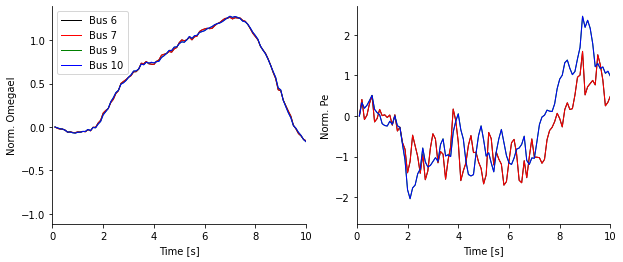

In [5]:
idx = 0
cmap = 'krgb'
fig,ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)
for i,var_suffix in enumerate(var_suffixes):
    for j,bus_id in enumerate(bus_ids):
        eval(f"ax[i].plot(time, {var_suffix}_bus{bus_id}_norm[idx,:], cmap[j], lw=1, label='Bus {bus_id}')")
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel('Norm. ' + var_suffix.capitalize())
    for side in 'right','top':
        ax[i].spines[side].set_visible(False)
ax[0].legend(loc='best')
ax[0].set_xlim([0, 10])